# Ribet-Herbrand experiments

First lets experiment with the density of irregular primes.

Finding irregular primes, and proving FLT for small values of $p$ was an important early use of computers in number theory.

In [1]:
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(10,7), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('π')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

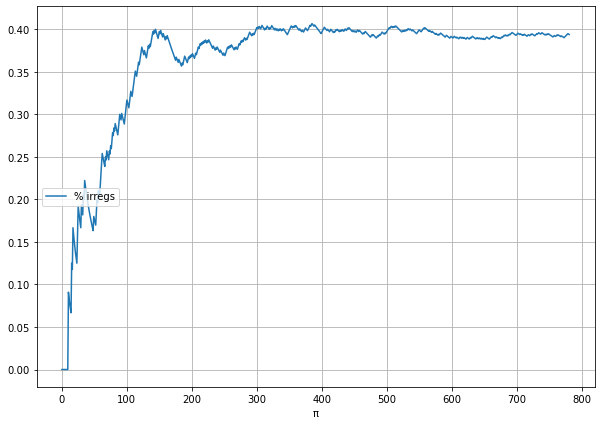

In [2]:
data = collections.defaultdict(list)
tot = 0
irreg = 0
for p in prime_range(3,6000):
    tot += 1
    if 0 in bernoulli_mod_p(p):
        irreg += 1
    data['% irregs'].append(irreg/tot)
    live_plot(data)

If the numerators of the Bernoulli numbers are uniformly random modulo odd primes, then the index
of irregularity should satisfy a Poisson distribution with mean 1/2; as a special
case, noted by Lehmer and Siegel, the density of the irregular primes should
be $1-e^{-1/2}$.

In [3]:
1- data["% irregs"][-1].n()

0.606138107416880

In [6]:
e^(-1/2).n()

0.606530659712633

Question:
----------
Some primes have the property that there are multiple $3\le k\le p - 3$ for which $p|B_{k}$  i.e. there are two distinct bernoulli numbers $B_k$ whose numerator is divisible by $p$, giving a larger class group?
The number of such $p$ is called the index of irregularity,  check experimentally that the density of primes with index 2 matches this probability distribution.

Question:
------------
Does there exist a prime $p$ such that $p|B_{p-3}$ the extreme case of Ribet-Herbrand.

## Finding modular forms

The first irregular prime is 37 as
https://www.lmfdb.org/NumberField/36.0.7710105884424969623139759010953858981831553019262380893.1
has class number 37
and $v_{37}( B_{32})\ge 1$.

See https://oeis.org/A000928

In [7]:
%display latex
K.<zeta37> = CyclotomicField(37)
print(K.class_group(proof=False))

Class group of order 37 with structure C37 of Cyclotomic Field of order 37 and degree 36


But what is the character through which Galois acts?

In [8]:
I = K.class_group(proof=False).gen(); I

Fractional ideal class (149, zeta37 - 73)

In [9]:
G = K.galois_group()
s = G.gen()
s(zeta37)

zeta37^2

So
$$\chi(s) = 2$$
let us now compute $I^\sigma$

In [10]:
I.ideal().gens_two()

(149, zeta37 - 73)

In [11]:
Is = I.parent()([s(t) for t in I.ideal().gens_two()]); Is

Fractional ideal class (149, zeta37 + 64)

In [12]:
for i in range(36): # takes a minute
    if (Is/(I^i)).is_principal():
        print(i)

32


indeed
$$I^\sigma = I^{32} = I^{ \chi(\sigma)^5}$$
so the ideal class of 
$I$ lies in
$$C(\chi^{5}) = C(\chi^{37-32})$$
where $C = \operatorname{Cl}(K)/ \operatorname{Cl}(K)^{37}$
and the cusp form constructed by Ribet is in:

In [ ]:
CuspForms(Gamma1(37))

In [14]:
def find_ribet(N,k):
    D = DirichletGroup(N)
    pp = D.base_ring().prime_above(N)
    Rp = pp.residue_field()
    for om in DirichletGroup(N):
        if all(Rp(om(i)) == i for i in range(N)):
            break
    omk = om^(k-2)
    omk2 = omk.minimize_base_ring()
    print (omk2.order(), omk2.conrey_number())
    S = CuspForms(omk2)
    print(S)
    for f in S.newforms('a'):
        H = f.hecke_eigenvalue_field()
        if H is QQ:
            ps = [N]
            HNs = [GF(N)]
        else:
            ps = H.primes_above(N)
            HNs = [p.residue_field() for p in ps]
        for p,HN in zip(ps, HNs):
            for l in prime_range(100):
                if l == N:
                    continue
                if HN(f[l]) != 1 + l^(k-1):
                    break
            else:
                return (p,f)
p,f = find_ribet(37, 32)
f

6 11
Cuspidal subspace of dimension 2 of Modular Forms space of dimension 4, character [-zeta6 + 1] and weight 2 over Cyclotomic Field of order 6 and degree 2


q + a0*q^2 + ((zeta6 - 2)*a0 - zeta6 + 1)*q^3 + (zeta6 - 1)*q^4 + (-2*zeta6*a0 - zeta6 - 1)*q^5 + O(q^6)

In [15]:
p

Fractional ideal ((-zeta6 - 1)*a0 + 2*zeta6 - 2)

We can try and find this form on the lmbfdb now by looking at traces and comparing with
https://www.lmfdb.org/ModularForm/GL2/Q/holomorphic/?level=37&weight=2&search_type=List

In [16]:
print(f[2].trace())
print(f[3].trace())
print(f[5].trace())
print(f[7].trace())

0
2
-6
0


So this is
https://www.lmfdb.org/ModularForm/GL2/Q/holomorphic/37/2/e/a/

Actually we  can tell this just from the character alone.
Just from searching for the right character orbit https://www.lmfdb.org/ModularForm/GL2/Q/holomorphic/?count=None&hst=List&weight=2&char_label=37.11&search_type=List

In [17]:
f.hecke_eigenvalue_field()

Number Field in a0 with defining polynomial x^2 + zeta6 - 1 over its base field

Question:
---------

Can one find any other examples in this way? Seems hard!

Here is some other random code:

In [27]:
N = 100
for k in range(2,N,2):
    for p,_ in bernoulli(k).numerator().factor():
        if k > p - 3:
            continue
        print(p,k)
        print((p-1)%(k-2))

691 12
0
3617 16
4
43867 18
10
283 20
12
617 20
4
131 22
10
593 22
12
103 24
14
2294797 24
20
657931 26
18
9349 28
14
362903 28
20
1721 30
12
1001259881 30
12
37 32
6
683 32
22
305065927 32
6
151628697551 34
14
26315271553053477373 36
0
154210205991661 38
24
137616929 40
4
1897170067619 40
8
1520097643918070802691 42
10
59 44
16
8089 44
24
2947939 44
0
1798482437 44
16
383799511 46
6
67568238839737 46
8
653 48
8
56039 48
10
153289748932447906241 48
6
417202699 50
42
47464429777438199 50
22
577 52
26
58741 52
40
401029177 52
26
4534045619429 52
28
39409 54
44
660183281 54
16
1120412849144121779 54
50
113161 56
30
163979 56
34
19088082706840550550313 56
42
67 58
10
186707 58
2
6235242049 58
0
37349583369104129 58
24
2003 60
30
5549927 60
22
109317926249509865753025015237911 60
46
157 62
36
266689 62
48
329447317 62
36
28765594733083851481 62
0
1226592271 64
18
87057315354522179184989699791727 64
28
839 66
6
159562251828620181390358590156239282938769 66
16
101 68
34
123143 68
52
182232934

In [25]:
for p in prime_range(3,10000):
    for (k,i) in enumerate(bernoulli_mod_p(p)):
        if i != 0:
            continue
        #print(p, 2*k)
        if (p-1)/gcd(p-1, 2*k-2) <= 4:
            print(p,2*k)

8849 6638
